In [1]:
from Assemblies.game import GameField
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
#import bqplot.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, VBox
import ipywidgets as widgets

In [2]:
def show_field(field, point_size=10, scale=10):
    plt.clf()
    fig = plt.figure(figsize = (scale*1, scale*0.666))
    point_size = scale / (len(field)**2) * 10000
    
    
    y, x = (1-field).nonzero()
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h')
    y, x = field.nonzero()
    plt.scatter(x + y*np.sin(np.pi/6), y * np.sin(np.pi/3), s=point_size, marker='h', c='r')
    plt.show()

In [3]:
def get_field(b):
    show_field(fields[b].field, scale=20)

In [4]:
def on_step_btn(current):
    for b in b_points:
        GameField.evolve(fields[b])

In [5]:
b_points = np.array([1, 5/4, 4/3, 6/4, 5/3, 7/4, 2, 7/3]) + 0.01

def init(size):
    global b_points 
    fields = {b : GameField(size, b) for b in b_points}
    
    for b in b_points:
        fields[b].field = np.zeros((size, size), dtype=int)
        fields[b].field[int(size/2), int(size/2)] = 1
        
    return fields

## Initialization

In [6]:
size = 33

fields = init(size)

<IPython.core.display.Javascript object>


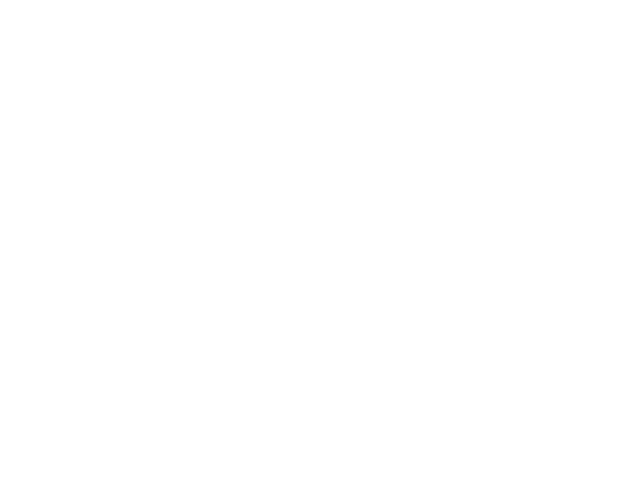

<IPython.core.display.Javascript object>


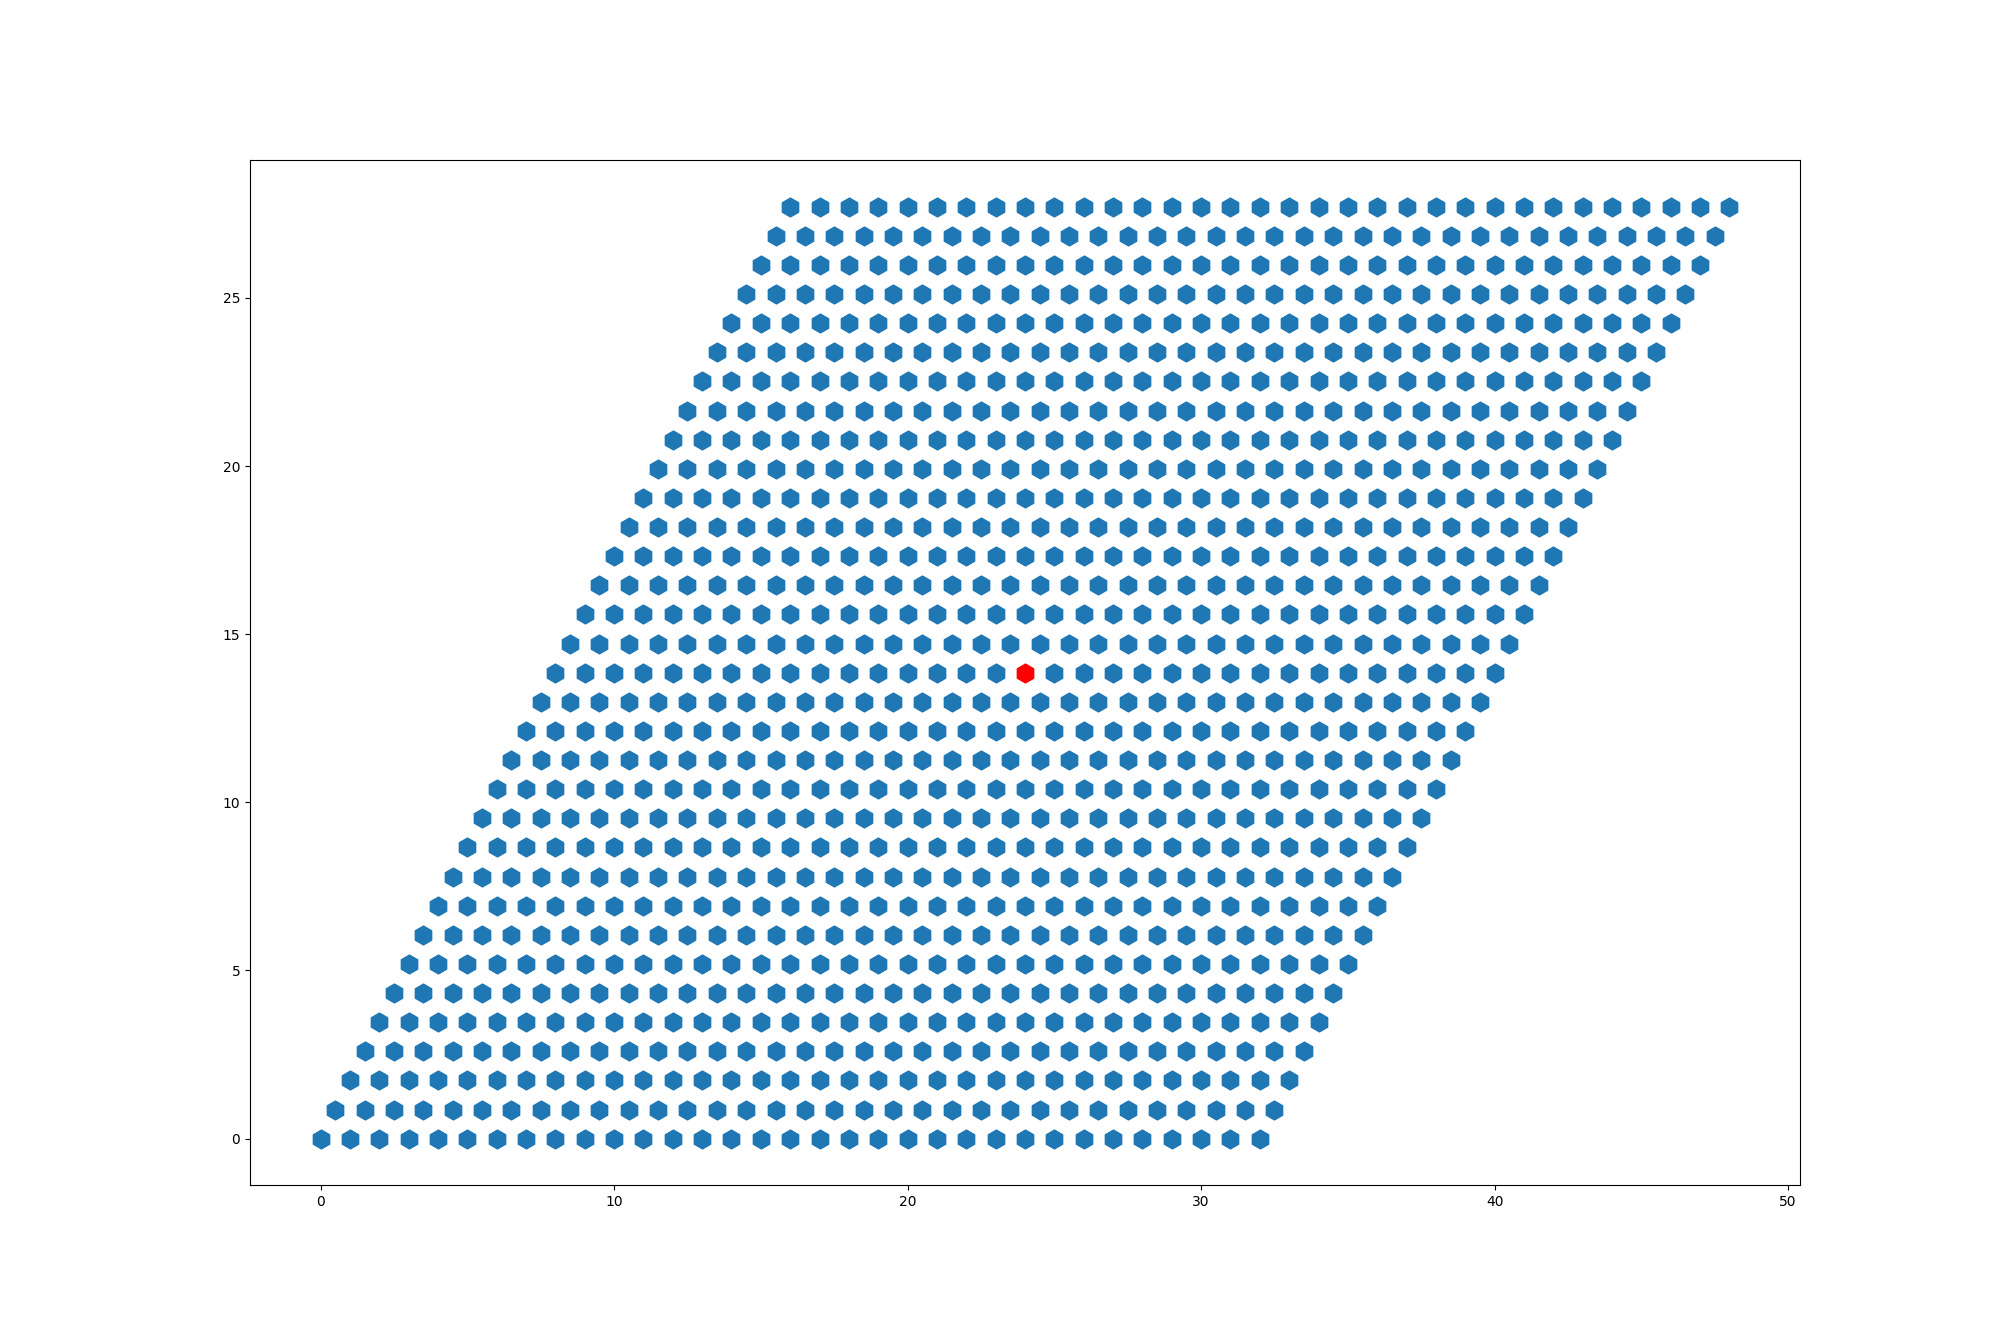

A Jupyter Widget

A Jupyter Widget

In [7]:
#Init
size_int = widgets.BoundedIntText(
    value=3,
    min=3,
    max=1000,
    step=3,
    description='Size:',
    disabled=False
)
init_btn = widgets.ToggleButton(
    value=False,
    description='Init',
    disabled=False,
    button_style=''
)
def on_init_btn(current):
    global fields
    fields = init(size_int.value)
    
init_btn.observe(on_init_btn)
    
#Slider   
b_sldr = widgets.Dropdown(options=b_points, description='b:', continuous_update=False)


#Steps
step_count_int = widgets.BoundedIntText(
    value=1,
    min=1,
    max=1000,
    step=1,
    description='Count:',
    disabled=False
)

step_btn = widgets.ToggleButton(
    value=False,
    description='Step',
    disabled=False,
    button_style=''
)
def on_step_btn(current):
    current.value = False
    global step_count_int
    for i in range(step_count_int.value):
        GameField.evolve(fields[b_sldr.value])
        
step_btn.observe(on_step_btn)


ui = widgets.HBox([size_int, init_btn, b_sldr, step_count_int, step_btn])


def f(init, b, step):
    get_field(b)

out = widgets.interactive_output(f, {'init': init_btn, 'b': b_sldr, 'step' : step_btn})

display(ui, out)